# Análisis de los límites de número de partículas del Quadtree

Verificamos que número de partículas puede ser implementado con el código de quadtree sabiendo que es sensible a los parámetros:

NCRIT = 5

MAX_NEI = 48

Sabemos que anteriormente el código falló con una malla de 50x50 pero veamos en que punto falla, para lo cuál se crea la carpeta "quadtree_verification" donde creamos las condiciones iniciales de prueba para verificar que el árbol no produzca violaciones de segmento. Sabemos que el árbol funciona adecuadamente para una malla de 40x40 por lo que se propone 45x45 como prueba inicial de falla.

1. Visualicemos la figura de los 40x40 para tener como referencia

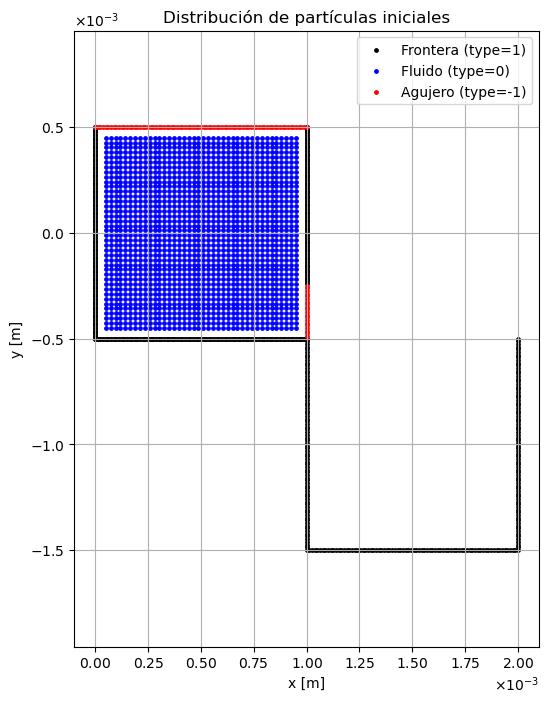

In [1]:
from utils.plot_ics import plot_ics
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

ics_vaciado20_40x40 = f"{PROJECT_ROOT}/Output/init_cond/vaciado20_40x40_tree/vaciado20_est40x40.txt"

plot_ics(ics_vaciado20_40x40)

2. Comencemos creando la figura con un fluido cuadrado de 45x45.

In [2]:
from utils.create_ics import create_ics_txt

BOUNDARY_FILE45 = "quadtree_verification/vaciado10_45x45_boundary.json"
FLUID_FILE45 = "quadtree_verification/vaciado10_45x45_fluid.json"

OUTPUT_NAME45 = "quadtree_verification/vaciado10_45x45.txt"
OUTPUT_LOG45 = "quadtree_verification/vaciado10_45x45.log"

create_ics_txt(BOUNDARY_FILE45,
               FLUID_FILE45,
               OUTPUT_NAME45,
               OUTPUT_LOG45,
               PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_45x45_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_45x45_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   quadtree_verification/vaciado10_45x45.txt
  • Nombre archivo resumen:  quadtree_verification/vaciado10_45x45.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/quadtree_verification/vaciado10_45x45.txt



0

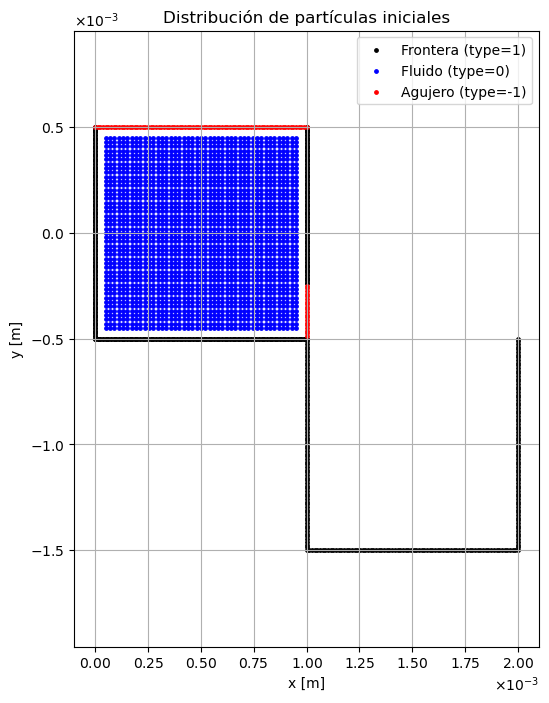

In [3]:
from utils.plot_ics import plot_ics

ics_vaciado10_45x45 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_45x45.txt"

plot_ics(ics_vaciado10_45x45)

4. Configuración específica de quadtree para esta geometría y unos 2000 pasos de base para saber si esta no genera la violación de segmento.

In [4]:
from utils.create_simJSON import create_simulation_config

OUTPUT_45TXT = "Output/init_cond/quadtree_verification/vaciado10_45x45.txt"

create_simulation_config(
    experiment_name="vaciado10_45x45_tree",
    input_file=OUTPUT_45TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 2000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_45x45_tree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado10_45x45_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_45x45_tree/params.json')

5. Ejecutamos la simulación en base al JSON antes generado.

In [7]:
from utils.run_sim import run_single_simulation
from pathlib import Path

vaciado10_45x45_dir = Path(f"{PROJECT_ROOT}/Output/vaciado10_45x45_tree")

run_single_simulation(
    experiment_dir=vaciado10_45x45_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado10_45x45_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_45x45_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2804 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2805 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_45x45.txt

[particleSummary] Número total de partículas: 2805
Fluido: 2025, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_45x45_tree/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadt

Aproximado de 2 minutos para la simulación

Ahora que tenemos que para 45x45 funciona, seguimos aumentando de a poco el número de valores hasta que NCRIT = 5, no sea suficiente para los cálculos del árbol binario.

6. Generamos las partículas con una malla de 47x47.

In [8]:
from utils.create_ics import create_ics_txt

BOUNDARY_FILE47 = "quadtree_verification/vaciado10_47x47_boundary.json"
FLUID_FILE47 = "quadtree_verification/vaciado10_47x47_fluid.json"

OUTPUT_NAME47 = "quadtree_verification/vaciado10_47x47.txt"
OUTPUT_LOG47 = "quadtree_verification/vaciado10_47x47.log"

create_ics_txt(BOUNDARY_FILE47,
               FLUID_FILE47,
               OUTPUT_NAME47,
               OUTPUT_LOG47,
               PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_47x47_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_47x47_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   quadtree_verification/vaciado10_47x47.txt
  • Nombre archivo resumen:  quadtree_verification/vaciado10_47x47.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/quadtree_verification/vaciado10_47x47.txt



0

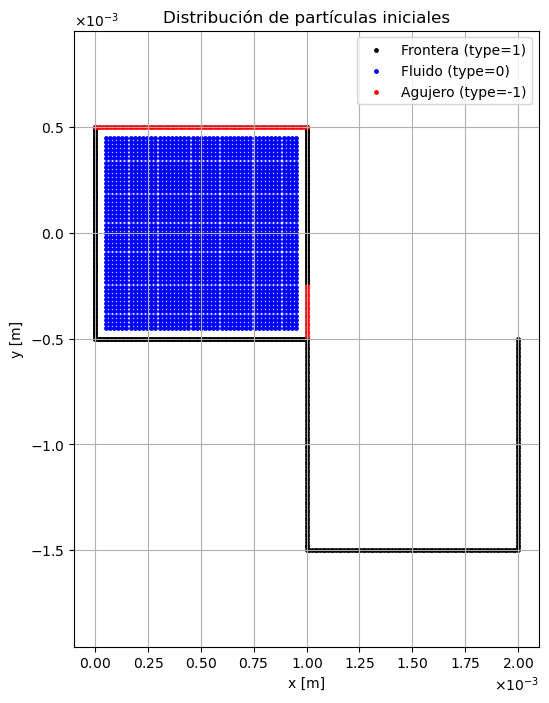

In [9]:
from utils.plot_ics import plot_ics

ics_vaciado10_47x47 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_47x47.txt"

plot_ics(ics_vaciado10_47x47)

In [ ]:
from utils.create_simJSON import create_simulation_config

OUTPUT_47TXT = "Output/init_cond/quadtree_verification/vaciado10_47x47.txt"

create_simulation_config(
    experiment_name="vaciado10_47x47_tree",
    input_file=OUTPUT_47TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 2000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_47x47_tree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado10_47x47_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_47x47_tree/params.json')

In [11]:
from utils.run_sim import run_single_simulation
from pathlib import Path

vaciado10_47x47_dir = Path(f"{PROJECT_ROOT}/Output/vaciado10_47x47_tree")

run_single_simulation(
    experiment_dir=vaciado10_47x47_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado10_47x47_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_47x47_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2988 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2989 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_47x47.txt

[particleSummary] Número total de partículas: 2989
Fluido: 2209, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_47x47_tree/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadt

La simulación con el quadtree aún funciona para 47x47 partículas de fluido, incluso demoró un poco menos que la anterior (ambas alrededor de 2 minutos).

7. Aumentamos la malla a 49x49.

In [12]:
from utils.create_ics import create_ics_txt

BOUNDARY_FILE49 = "quadtree_verification/vaciado10_49x49_boundary.json"
FLUID_FILE49 = "quadtree_verification/vaciado10_49x49_fluid.json"

OUTPUT_NAME49 = "quadtree_verification/vaciado10_49x49.txt"
OUTPUT_LOG49 = "quadtree_verification/vaciado10_49x49.log"

create_ics_txt(BOUNDARY_FILE49,
               FLUID_FILE49,
               OUTPUT_NAME49,
               OUTPUT_LOG49,
               PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_49x49_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_49x49_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   quadtree_verification/vaciado10_49x49.txt
  • Nombre archivo resumen:  quadtree_verification/vaciado10_49x49.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/quadtree_verification/vaciado10_49x49.txt



0

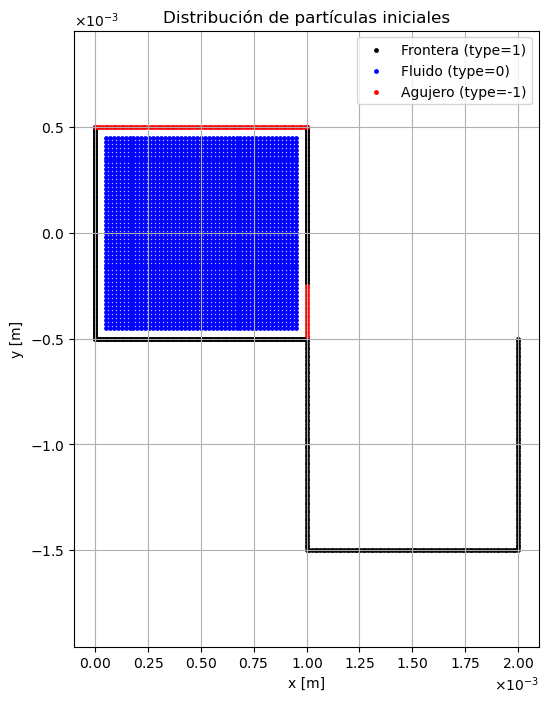

In [13]:
from utils.plot_ics import plot_ics

ics_vaciado10_49x49 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_49x49.txt"

plot_ics(ics_vaciado10_49x49)

In [14]:
from utils.create_simJSON import create_simulation_config

OUTPUT_49TXT = "Output/init_cond/quadtree_verification/vaciado10_49x49.txt"

create_simulation_config(
    experiment_name="vaciado10_49x49_tree",
    input_file=OUTPUT_49TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 2000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_49x49_tree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado10_49x49_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_49x49_tree/params.json')

In [15]:
from utils.run_sim import run_single_simulation
from pathlib import Path

vaciado10_49x49_dir = Path(f"{PROJECT_ROOT}/Output/vaciado10_49x49_tree")

run_single_simulation(
    experiment_dir=vaciado10_49x49_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado10_49x49_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_49x49_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 3180 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 3181 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_49x49.txt

[particleSummary] Número total de partículas: 3181
Fluido: 2401, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_49x49_tree/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadt

La simulación funciona con NCRIT = 5, para una malla regular de 49x49, probamos la malla de 50x50 que había fallado anteriormente.

8. Malla de 50x50 falló anteriormente.

In [17]:
from utils.create_ics import create_ics_txt

BOUNDARY_FILE50 = "quadtree_verification/vaciado10_50x50_boundary.json"
FLUID_FILE50 = "quadtree_verification/vaciado10_50x50_fluid.json"

OUTPUT_NAME50 = "quadtree_verification/vaciado10_50x50.txt"
OUTPUT_LOG50 = "quadtree_verification/vaciado10_50x50.log"

create_ics_txt(BOUNDARY_FILE50,
               FLUID_FILE50,
               OUTPUT_NAME50,
               OUTPUT_LOG50,
               PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_50x50_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_50x50_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   quadtree_verification/vaciado10_50x50.txt
  • Nombre archivo resumen:  quadtree_verification/vaciado10_50x50.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/quadtree_verification/vaciado10_50x50.txt



0

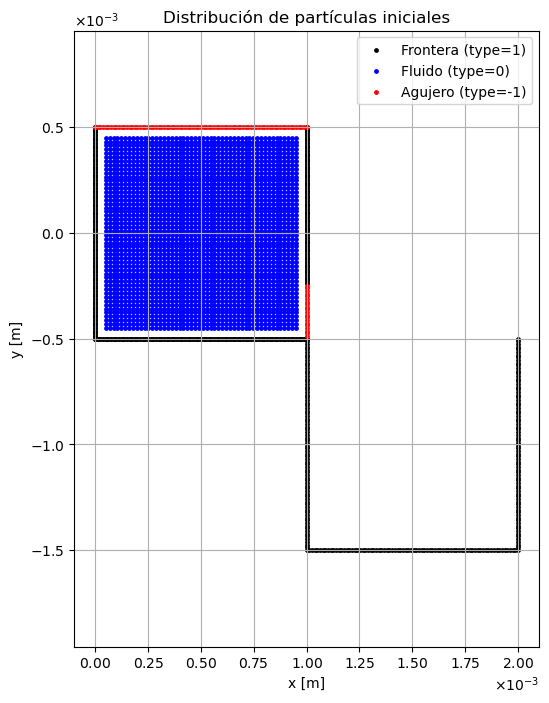

In [18]:
from utils.plot_ics import plot_ics

ics_vaciado10_50x50 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

plot_ics(ics_vaciado10_50x50)

In [19]:
from utils.create_simJSON import create_simulation_config

OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

create_simulation_config(
    experiment_name="vaciado10_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 2000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado10_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_50x50_tree/params.json')

In [20]:
from utils.run_sim import run_single_simulation
from pathlib import Path

vaciado10_50x50_dir = Path(f"{PROJECT_ROOT}/Output/vaciado10_50x50_tree")

run_single_simulation(
    experiment_dir=vaciado10_50x50_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado10_50x50_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_50x50_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 3279 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 3280 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_50x50.txt

[particleSummary] Número total de partículas: 3280
Fluido: 2500, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_50x50_tree/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadt